In [42]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [43]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:], gray=True)

In [44]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.3, img.shape)


In [45]:
lmbda = 0.04
opt = tvl2.TVL2Deconv.Options({'Verbose': True, 'MaxMainIter': 200,
                               'gEvalY': False})

In [46]:
b = tvl2.TVL2Deconv(np.ones((1,1)), imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  5.80e+03  2.32e+03  8.70e+04  2.84e-01  2.03e+00  1.80e-01
   1  5.32e+03  1.12e+03  1.05e+05  1.13e-01  2.90e-01  1.80e-01
   2  5.30e+03  9.09e+02  1.10e+05  7.01e-02  5.12e-02  1.12e-01
   3  5.30e+03  9.12e+02  1.10e+05  5.12e-02  3.81e-02  1.31e-01
   4  5.30e+03  9.08e+02  1.10e+05  3.83e-02  2.64e-02  1.52e-01
   5  5.29e+03  9.13e+02  1.10e+05  2.89e-02  1.97e-02  1.83e-01
   6  5.29e+03  9.11e+02  1.10e+05  2.21e-02  1.46e-02  2.22e-01
   7  5.29e+03  9.13e+02  1.10e+05  1.70e-02  1.10e-02  2.73e-01
   8  5.29e+03  9.12e+02  1.10e+05  1.31e-02  8.24e-03  3.39e-01
   9  5.29e+03  9.13e+02  1.10e+05  1.02e-02  6.23e-03  4.27e-01
  10  5.29e+03  9.12e+02  1.10e+05  7.99e-03  4.69e-03  5.47e-01
  11  5.29e+03  9.12e+02  1.10e+05  6.28e-03  3.55e-03  7.15e-01
  12  5.29e+03  9.12e+02  1.10e+05  4.96e-03  2.67e-03  9.51e-01
  13  5.29e+03  9.12e+02 

In [47]:
print("TVL2Deconv solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Deconv solve time: 44.65 s
Noisy image PSNR:     9.16 dB
Denoised image PSNR: 11.31 dB


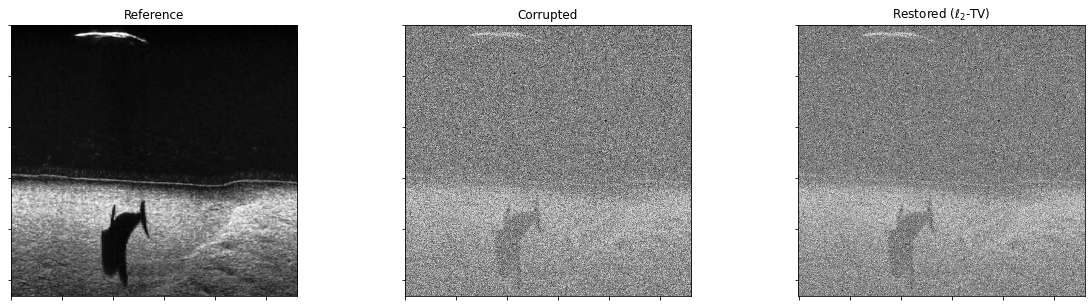

In [48]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

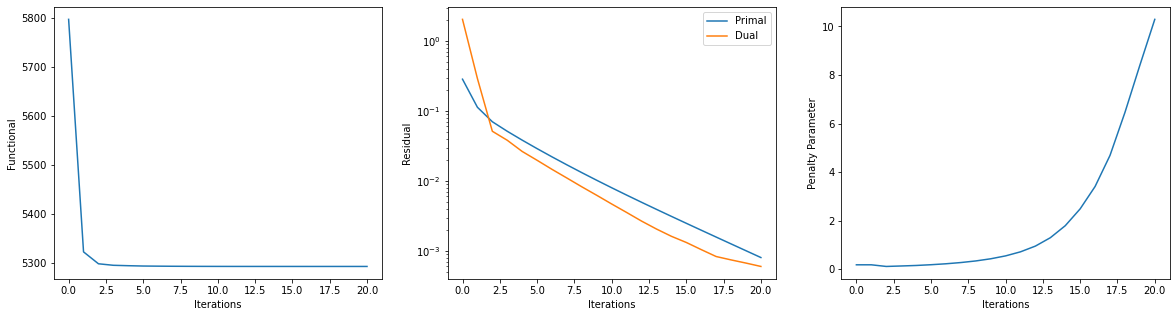

In [49]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

In [50]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.13762584974139044
